- Author: Sachin Pathania
- Git : https://github.com/SachinPathania

The objective of this exercise is to help your team to generate business insights using different data 
exploratory techniques.

Data Information
----
We have provided a dataset namely 'analytics_test.csv'(note: i have changed the file name ixigo_data.csv) which consists of 13 columns.
Each row in the file represents, a booking information.
Column names and description ---

1) userId - User Ids

2) bookingId - Trip Ids

3) bookingDate - Booking creation timestamp (IST)

4) journeyType - Type of journey

5) isInternational - Type of travel (True for International and False for Domestic)

6) providerId - Provider types

7) originCode - Origin codes

8) destinationCode - Destination codes

9) cabinClass - class (Business, Economy, etc.)

10) devicePlatform - Device on which the booking was made 
(iximaad-Android Flights App, iximaio-IOS Flights App, iximatr-Android Trains App,
 iximweb-Mobile Web,  ixiweb-Web, mmxmatr-Miscelleneous)
 
11) totalFare - total amount of booking

12) onwardDeparture - journey timestamp (GMT)

13) userType - type of user 
(First time user - New User, Booking made after long time - Reactivated User, Frequent Bookers - Old User)



# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',10000)
import warnings
warnings.filterwarnings("ignore")

# 2. Import Data

In [2]:
df=pd.read_csv('flight_data.csv')

In [3]:
df.head()
#checking top 5 rows of the data

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
0,51b022a5e4b0aaef8f15cdb5,18062077104,20/06/2018 22:16,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,07/08/2018 23:35,newUser
1,52381fa4e4b0802b434024be,1.80625E+11,25/06/2018 15:51,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,27/07/2018 12:50,oldUser
2,52d952bbe4b0093a9b9cbf78,1.80612E+11,12/06/2018 20:33,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,12/06/2018 19:55,oldUser
3,530779c1e4b00a4950542af3,5.0684E+11,05/06/2018 23:27,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,06/06/2018 14:10,oldUser
4,530779c1e4b00a4950542af3,PRL06E2WAA3,19/06/2018 14:52,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,20/06/2018 5:20,oldUser


In [4]:
df.shape
#total rows in the data : 5098
#total columns in the data : 13

(5098, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   userId           5098 non-null   object
 1   bookingId        5098 non-null   object
 2   bookingDate      5098 non-null   object
 3   journeyType      5098 non-null   object
 4   isInternational  5098 non-null   bool  
 5   providerId       5098 non-null   int64 
 6   originCode       5098 non-null   object
 7   destinationCode  5098 non-null   object
 8   cabinClass       5098 non-null   object
 9   devicePlatform   5098 non-null   object
 10  totalFare        5098 non-null   int64 
 11  onwardDeparture  5098 non-null   object
 12  userType         5098 non-null   object
dtypes: bool(1), int64(2), object(10)
memory usage: 483.0+ KB


In [6]:
df.describe()

,providerId,totalFare
count,5098.000000,5098.000000
mean,142.836603,4289.686740
std,291.245588,3364.992905
min,1.000000,1489.000000
25%,12.000000,2198.000000
50%,12.000000,3261.500000
75%,103.000000,5197.250000
max,1020.000000,62862.000000


In [7]:
df.isnull().sum()
#no null values present in the data

userId             0
bookingId          0
bookingDate        0
journeyType        0
isInternational    0
providerId         0
originCode         0
destinationCode    0
cabinClass         0
devicePlatform     0
totalFare          0
onwardDeparture    0
userType           0
dtype: int64

## 2.1 Converting Datatype of required columns

In [8]:
df['bookingDate'] =  pd.to_datetime(df['bookingDate']) #this is in IST

In [9]:
df['onwardDeparture'] =  pd.to_datetime(df['onwardDeparture']) #this is in GMT

In [10]:
#again checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   userId           5098 non-null   object        
 1   bookingId        5098 non-null   object        
 2   bookingDate      5098 non-null   datetime64[ns]
 3   journeyType      5098 non-null   object        
 4   isInternational  5098 non-null   bool          
 5   providerId       5098 non-null   int64         
 6   originCode       5098 non-null   object        
 7   destinationCode  5098 non-null   object        
 8   cabinClass       5098 non-null   object        
 9   devicePlatform   5098 non-null   object        
 10  totalFare        5098 non-null   int64         
 11  onwardDeparture  5098 non-null   datetime64[ns]
 12  userType         5098 non-null   object        
dtypes: bool(1), datetime64[ns](2), int64(2), object(8)
memory usage: 483.0+ KB


# 3. Questions:

### 3.1) What is the percentage of new users in each of the top sectors (Origin-Destination pairs) month-wise?

In [11]:
df1 = df.groupby([df['bookingDate'].dt.month.rename('month'), 'userType','originCode','destinationCode'])['userId'].count()
df1=df1.to_frame()
df1=df1.reset_index()
df1.head()

,month,userType,originCode,destinationCode,userId
0,5,Reactivated,BLR,PNQ,1
1,5,Reactivated,CCU,DEL,1
2,5,newUser,AMD,DEL,3
3,5,newUser,BLR,PNQ,7
4,5,newUser,CCU,DEL,10


In [12]:
df11=df1[df1['userType']=='newUser'].sort_values(by='userId',ascending=False)
df11

,month,userType,originCode,destinationCode,userId
24,6,newUser,DEL,GAU,127
23,6,newUser,DEL,AMD,114
20,6,newUser,AMD,DEL,104
22,6,newUser,CCU,DEL,104
25,6,newUser,PNQ,BLR,100
21,6,newUser,BLR,PNQ,66
5,5,newUser,DEL,AMD,12
6,5,newUser,DEL,GAU,10
4,5,newUser,CCU,DEL,10
34,7,newUser,BLR,PNQ,9


In [13]:
df11=pd.DataFrame(df11.groupby(['userType','month','originCode','destinationCode'])['userId'].sum()/df['userType'].count()*100)

In [14]:
df11=df11.reset_index()
df11.columns=['UserType','Month','Origin','Destination','percentage of new users']
df11.sort_values(by='percentage of new users',ascending=False)

,UserType,Month,Origin,Destination,percentage of new users
10,newUser,6,DEL,GAU,2.491173
9,newUser,6,DEL,AMD,2.236171
6,newUser,6,AMD,DEL,2.040016
8,newUser,6,CCU,DEL,2.040016
11,newUser,6,PNQ,BLR,1.961554
7,newUser,6,BLR,PNQ,1.294625
3,newUser,5,DEL,AMD,0.235386
4,newUser,5,DEL,GAU,0.196155
2,newUser,5,CCU,DEL,0.196155
13,newUser,7,BLR,PNQ,0.176540


### 3.1 Summary:
- As per the data in the month of June we have seen large number of demands this can be due to summer vacations
- DEL- GUA, DEL - AMD, AMD - DEL and CCU- DEL have seen highest number of new users which is 2% more to rest other areas

### 3.2) Find the number of users who have booked more than twice on our Web platforms?

In [15]:
df2 = df.loc[(df.devicePlatform=='iximweb') | (df.devicePlatform=='ixiweb')]
df2=df2.groupby(['devicePlatform','userId'])['bookingId'].count()
df2=df2.to_frame()
df2=df2.reset_index()
a=df2[df2['bookingId']>=2].sort_values(by='bookingId',ascending=False) #included 2 and more than 2

In [16]:
a.head(15)

,devicePlatform,userId,bookingId
250,ixiweb,56f7b514386c4c09dcb01281,7
58,iximweb,59a6560d4bae682fbeaab8f3,5
361,ixiweb,58d524bf2b7cfc27bd075290,4
352,ixiweb,58ab09eea1b406208fde34b4,4
456,ixiweb,597ebeaa2b7cfc787ee34b40,4
368,ixiweb,58e3d6ee2b7cfc4babaff329,4
700,ixiweb,5ae022ff99fb750d0267185e,4
191,ixiweb,54dde50ce4b01e439aa3afb6,4
127,iximweb,5b0ea392fe35411273ef776c,4
284,ixiweb,578dacb7a61bd10baa77eb48,4


In [17]:
a.describe()

,bookingId
count,138.000000
mean,2.311594
std,0.722937
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,7.000000


In [18]:
a['userId'].count()

138

In [19]:
a.groupby('devicePlatform')['userId'].count()

devicePlatform
iximweb     25
ixiweb     113
Name: userId, dtype: int64

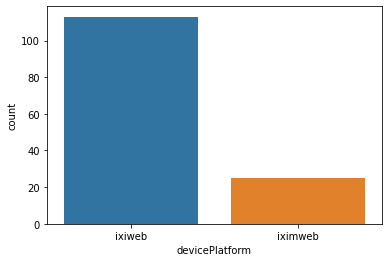

In [20]:
sns.countplot(a['devicePlatform'])
plt.show()

### 3.2 Summary :
- Total number of users who have booked twice or more than twice on Web platforms(iximweb' and 'ixiweb') are 138 users
- Majority of the booking have been done through 'ixiweb' which are 113 and on 'icimweb' are 25

### 3.3) What is trend for Advance Bookers.

In [21]:
df.head()

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:00,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,2018-07-08 23:35:00,newUser
1,52381fa4e4b0802b434024be,1.80625E+11,2018-06-25 15:51:00,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 12:50:00,oldUser
2,52d952bbe4b0093a9b9cbf78,1.80612E+11,2018-12-06 20:33:00,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-12-06 19:55:00,oldUser
3,530779c1e4b00a4950542af3,5.0684E+11,2018-05-06 23:27:00,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 14:10:00,oldUser
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:00,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 05:20:00,oldUser


In [22]:
df['onwardDeparture']=df['onwardDeparture'].dt.tz_localize("GMT").dt.tz_convert('Asia/Kolkata')

In [23]:
df['onwardDeparture']=pd.to_datetime(df['onwardDeparture'])

### - NOTE:
    - Converting onwatDeparture timestamp from GMT to IST because bookingDate timestamp is an IST format
    - Need to take the difference between both the Dates through which we will get the Advance Booker details

In [24]:
df.head()

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:00,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,2018-07-09 05:05:00+05:30,newUser
1,52381fa4e4b0802b434024be,1.80625E+11,2018-06-25 15:51:00,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 18:20:00+05:30,oldUser
2,52d952bbe4b0093a9b9cbf78,1.80612E+11,2018-12-06 20:33:00,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-12-07 01:25:00+05:30,oldUser
3,530779c1e4b00a4950542af3,5.0684E+11,2018-05-06 23:27:00,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 19:40:00+05:30,oldUser
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:00,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 10:50:00+05:30,oldUser


### Feature Engineering
### -NOTE:
#### Creating new column : "'Advance_bookers_day_Difference" which will give the number of days from Booking to Departure

In [25]:
df['Advance_bookers_day_Difference'] = (df['onwardDeparture'].dt.date.sub(df['bookingDate'].dt.date))
df.head() 

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,Advance_bookers_day_Difference
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:00,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,2018-07-09 05:05:00+05:30,newUser,19 days
1,52381fa4e4b0802b434024be,1.80625E+11,2018-06-25 15:51:00,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 18:20:00+05:30,oldUser,32 days
2,52d952bbe4b0093a9b9cbf78,1.80612E+11,2018-12-06 20:33:00,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-12-07 01:25:00+05:30,oldUser,1 days
3,530779c1e4b00a4950542af3,5.0684E+11,2018-05-06 23:27:00,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 19:40:00+05:30,oldUser,31 days
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:00,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 10:50:00+05:30,oldUser,1 days


In [26]:
df.shape

(5098, 14)

In [27]:
#df['Difference'].value_counts(ascending=False)

In [28]:
#after created new column,have seen that in some of the rows have got negative values because in 
#some entries departure time is less compare to the Booking time

In [29]:
df3=df[df['Advance_bookers_day_Difference']>'0 days']
#filtering positive values

In [30]:
#df3.groupby(['Difference','originCode','destinationCode'])['userId'].count()

In [31]:
#df3.groupby(['Difference','cabinClass','journeyType'])['totalFare'].mean()

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 0 to 5096
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype                       
---  ------                          --------------  -----                       
 0   userId                          3411 non-null   object                      
 1   bookingId                       3411 non-null   object                      
 2   bookingDate                     3411 non-null   datetime64[ns]              
 3   journeyType                     3411 non-null   object                      
 4   isInternational                 3411 non-null   bool                        
 5   providerId                      3411 non-null   int64                       
 6   originCode                      3411 non-null   object                      
 7   destinationCode                 3411 non-null   object                      
 8   cabinClass                      3411 non-null   object              

In [33]:
df3['Advance_bookers_day_Difference']=df3['Advance_bookers_day_Difference'].astype(str)

In [34]:
df3['Day_diff_num'] = df3['Advance_bookers_day_Difference'].str.extract("(\d*\.?\d+)", expand=True)
#extracted numeric values from the 'Advance_bookers_day_Difference' column

In [35]:
df3.head()

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,Advance_bookers_day_Difference,Day_diff_num
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:00,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,2018-07-09 05:05:00+05:30,newUser,19 days,19
1,52381fa4e4b0802b434024be,1.80625E+11,2018-06-25 15:51:00,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 18:20:00+05:30,oldUser,32 days,32
2,52d952bbe4b0093a9b9cbf78,1.80612E+11,2018-12-06 20:33:00,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-12-07 01:25:00+05:30,oldUser,1 days,1
3,530779c1e4b00a4950542af3,5.0684E+11,2018-05-06 23:27:00,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 19:40:00+05:30,oldUser,31 days,31
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:00,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 10:50:00+05:30,oldUser,1 days,1


In [36]:
df3['Day_diff_num']=df3['Day_diff_num'].astype(int)

### -NOTE:
- creating function, to create 'Advance bookers bucket' for better analysing
- creating 5 buckets 1-15 days(those who book tickets in 1-15 days),16-30 days,31-45 days,46-70 days and more than 70 days

In [37]:
def conditions(i): 
    if i <=15: return '1-15'
    if i > 15 and i <=30: return '16-30'
    if i > 30 and i <=45: return '31-45'
    if i > 45 and i <=70: return '46-70'
    if i > 70: return '>70'

In [38]:
df3['Advance_bookers_bucket']=df3['Day_diff_num'].apply(conditions)

In [39]:
df3.head()

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,Advance_bookers_day_Difference,Day_diff_num,Advance_bookers_bucket
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:00,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,2018-07-09 05:05:00+05:30,newUser,19 days,19,16-30
1,52381fa4e4b0802b434024be,1.80625E+11,2018-06-25 15:51:00,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 18:20:00+05:30,oldUser,32 days,32,31-45
2,52d952bbe4b0093a9b9cbf78,1.80612E+11,2018-12-06 20:33:00,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-12-07 01:25:00+05:30,oldUser,1 days,1,1-15
3,530779c1e4b00a4950542af3,5.0684E+11,2018-05-06 23:27:00,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 19:40:00+05:30,oldUser,31 days,31,31-45
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:00,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 10:50:00+05:30,oldUser,1 days,1,1-15


In [40]:
df3['Advance_bookers_bucket'].value_counts()

1-15     1373
16-30     594
>70       592
46-70     451
31-45     401
Name: Advance_bookers_bucket, dtype: int64

## A.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='count'>

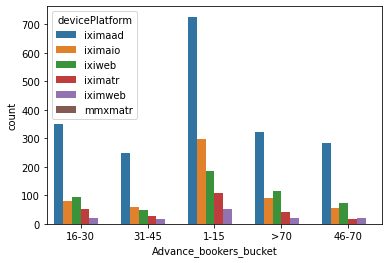

In [41]:
sns.countplot(df3['Advance_bookers_bucket'],hue=df3['devicePlatform'])

## B.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='count'>

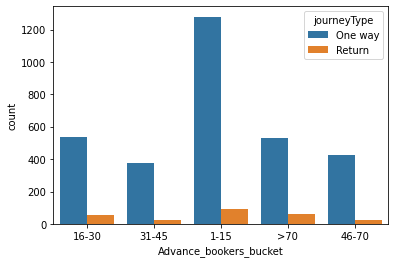

In [42]:
sns.countplot(df3['Advance_bookers_bucket'],hue=df3['journeyType'])

## C.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='count'>

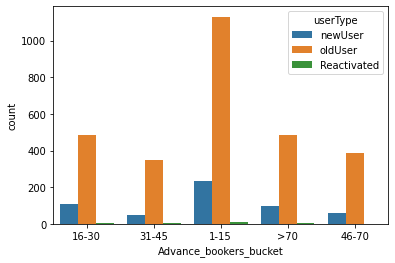

In [43]:
sns.countplot(df3['Advance_bookers_bucket'],hue=df3['userType'])

In [62]:
df3.groupby('Advance_bookers_bucket')['userType'].describe()

,count,unique,top,freq
Advance_bookers_bucket,,,,
1-15,1373,3,oldUser,1130
16-30,594,3,oldUser,483
31-45,401,3,oldUser,350
46-70,451,3,oldUser,387
>70,592,3,oldUser,487


## D.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='count'>

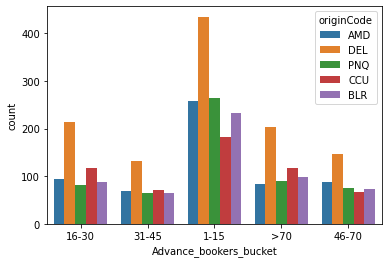

In [44]:
sns.countplot(df3['Advance_bookers_bucket'],hue=df3['originCode'])

## E.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='count'>

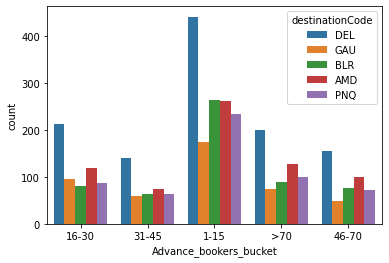

In [45]:
sns.countplot(df3['Advance_bookers_bucket'],hue=df3['destinationCode'])

## F.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='totalFare'>

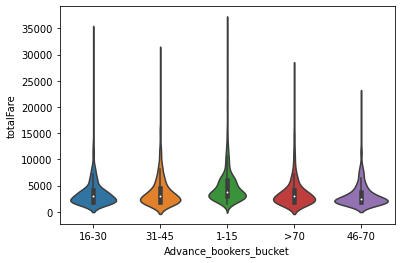

In [46]:
sns.violinplot(x='Advance_bookers_bucket',y='totalFare',data=df3)

## G.

<AxesSubplot:xlabel='Advance_bookers_bucket', ylabel='totalFare'>

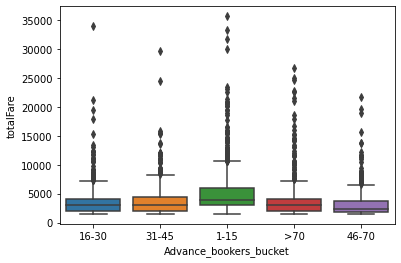

In [47]:
sns.boxplot(x='Advance_bookers_bucket',y='totalFare',data=df3)

## H.

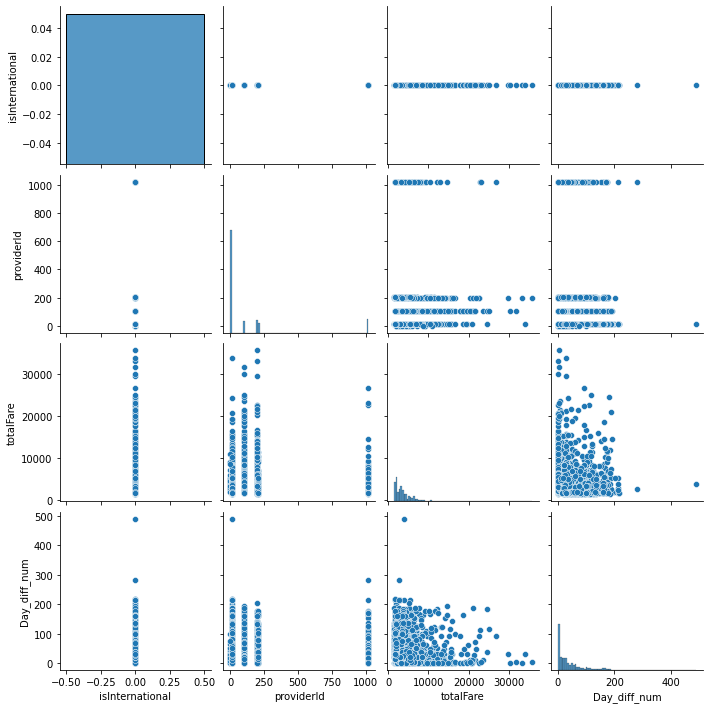

In [48]:
sns.pairplot(df3)

### 3.3 Summary:
- Majority of users come under 1-15 days but also we got the insights that people prefer to book 30+ days prior to get cheap tickets
- Fig. A : Shows that majority for users are booking the tickets from apps: Android follows by IOS
- In Fig C : Old users have the highest contribution in the advance booking 
- Delhi is the busiest Origin and Destination 
- According to fig. F & G: Boxplot shows that those who are booking in advance they have got the tickets in cheap price


### 3.4) What percentage of bookings do we get through apps (Android + Ios)?

In [49]:
df4 = df.loc[(df.devicePlatform=='iximaad') | (df.devicePlatform=='iximaio')]

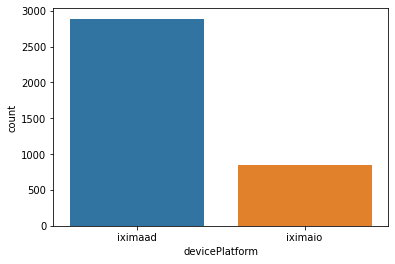

In [50]:
sns.countplot(df4['devicePlatform'])
plt.show()

In [51]:
df4.devicePlatform.value_counts(normalize=True)*100

iximaad    77.231427
iximaio    22.768573
Name: devicePlatform, dtype: float64

### 3.4 Summary:
#### Percentage of bookings we got through apps:
- Android : 77.23%
- Ios : 22.76%    

### 3.5) Number of users who reactivate their account per month?

- Checking unique number of months in the data

In [52]:
df['bookingDate'].dt.month.rename('month').unique()

array([ 6, 12,  5,  7,  8, 10,  9, 11], dtype=int64)

In [53]:
df5 = df.groupby([df['bookingDate'].dt.month.rename('month'), 'userType'])['userId'].count()
df5=df5.to_frame()

In [54]:
df5=df5.reset_index()

In [55]:
df5[df5['userType']=='Reactivated']

,month,userType,userId
0,5,Reactivated,2
3,6,Reactivated,27
6,7,Reactivated,1
9,8,Reactivated,1
12,9,Reactivated,3
17,11,Reactivated,1
20,12,Reactivated,1


### 3.5 Summary:
- From month 5 to 12 we have total 36 users who reactivated their account 
- Highest number of users we have 27 in the 6(June) month who reactivated their account

### 3.6) If you want to make cohorts of users who are likely to book international tickets, how would you identify and target them? Any one approach with proper explanation.

In [56]:
df['isInternational'].value_counts()
# NOte: In this dataset we dont have the information of internaltional users.

False    5098
Name: isInternational, dtype: int64

In [63]:
df.columns

Index(['userId', 'bookingId', 'bookingDate', 'journeyType', 'isInternational',
       'providerId', 'originCode', 'destinationCode', 'cabinClass',
       'devicePlatform', 'totalFare', 'onwardDeparture', 'userType',
       'Advance_bookers_day_Difference'],
      dtype='object')

In [64]:
df.groupby(['originCode','destinationCode','isInternational'])['userType'].value_counts(normalize=True)*100

originCode  destinationCode  isInternational  userType   
AMD         DEL              False            oldUser        83.780761
                                              newUser        15.324385
                                              Reactivated     0.894855
BLR         PNQ              False            oldUser        87.776484
                                              newUser        11.641444
                                              Reactivated     0.582072
CCU         DEL              False            oldUser        82.098765
                                              newUser        17.407407
                                              Reactivated     0.493827
DEL         AMD              False            oldUser        84.435402
                                              newUser        15.157681
                                              Reactivated     0.406918
            GAU              False            oldUser        74.404762
                   

## 3.6 Summary:
- If we want to know which users are likely to book international tickets, this can be possible using Supervised Learning Classfication (Machine Learning) model
- Can create a categorical target variable whether Users will Buy a ticket or not
- Important independent variables we have : isInternational, userType,origincode, destinationcode with these variables we can build a classification model with that we can get the accuracy of the model which will tell us how well model is predicting
- If we create cohort of users and check how frequent they travel we can get an idea of there traveling behaviour

# END